# PROBLEM STATEMENT

# Decision Tree - Heart Disease Dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split , GridSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

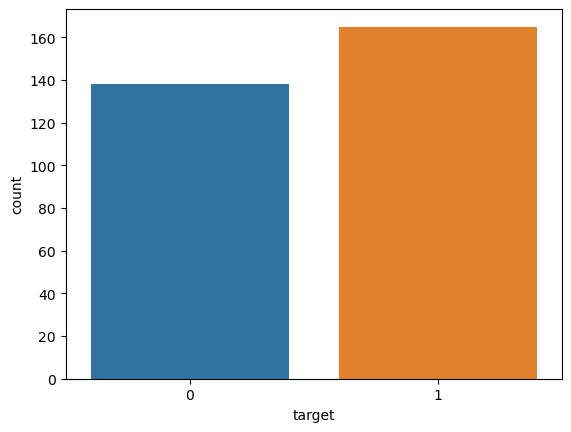

In [4]:
sns.countplot(x=df["target"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Train test Split

In [6]:
x = df.drop("target",axis=1)
y = df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

In [7]:
x_test

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
236   58    1   0       125   300    0        0      171      0      0.0   
94    45    0   1       112   160    0        1      138      0      0.0   
178   43    1   0       120   177    0        0      120      1      2.5   
245   48    1   0       124   274    0        0      166      0      0.5   
249   69    1   2       140   254    0        0      146      0      2.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
197   67    1   0       125   254    1        1      163      0      0.2   
17    66    0   3       150   226    0        1      114      0      2.6   
210   57    1   2       128   229    0        0      150      0      0.4   
46    44    1   2       140   235    0        0      180      0      0.0   
213   61    0   0       145   307    0        0      146      1      1.0   

     slope  ca  thal  
236      2   2     3  
94       1   0     2  
178      1   0     3  
245      1   0     3  
249      1   3     3  
..     ...  ..   ...  
197      1   2     3  
17       0   0     2  
210      1   1     3  
46       2   0     2  
213      1   0     3  

[61 rows x 13 columns]

# Model Training

In [8]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

# Model Evaluation

In [9]:
# Testing Data Accuracy
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Clssification Report:\n",clf_report)

Confusion Matrix :
 [[18 10]
 [ 6 27]]
Accuracy: 0.7377049180327869
Clssification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.73      0.82      0.77        33

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



In [10]:
# Training Data Accuracy
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Clssification Report:\n",clf_report)

Confusion Matrix :
 [[110   0]
 [  0 132]]
Accuracy: 1.0
Clssification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



# plot decision Tree

In [11]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf,feature_names=x.columns,class_names=["0","1"],filled=True)
print()
plt.savefig("Decision_Tree1.png")

# Hyperparameter Tuning

In [12]:
dt_clf = DecisionTreeClassifier()

hyperparameters = {"criterion" :['gini',"entropy"],
                    'max_depth':np.arange(3,8),
                    'min_samples_split':np.arange(2,20),#(6,20)
                    'min_samples_leaf':np.arange(2,15)} #(5,10)
    
gscv_dt_clf= GridSearchCV(dt_clf,hyperparameters,cv = 5)
gscv_dt_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [13]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=11)

In [14]:
# Training Data Accuracy after Hyperparameter Tuning
#dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=11)
dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train,y_train)

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Clssification Report:\n",clf_report)

Confusion Matrix :
 [[ 96  14]
 [ 13 119]]
Accuracy: 0.8884297520661157
Clssification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       110
           1       0.89      0.90      0.90       132

    accuracy                           0.89       242
   macro avg       0.89      0.89      0.89       242
weighted avg       0.89      0.89      0.89       242



In [15]:
# Testing Data Accuracy After Hyperparameter Tuning

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Clssification Report:\n",clf_report)

Confusion Matrix :
 [[21  7]
 [ 4 29]]
Accuracy: 0.819672131147541
Clssification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



In [16]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf,feature_names=x.columns,class_names=["0","1"],filled=True)
print()
plt.savefig("Decision_Tree_with_HYP.png")

# DUMP MODEL TO PICKEL FILE

In [17]:
import pickle
with open ('DecisionTreeClassification.pkl','wb') as f:
    pickle.dump(dt_clf,f)

# DATA PREDICTION EVALUATION

In [18]:
x_train.shape

(242, 13)

In [19]:
x_test.shape

(61, 13)

In [20]:
x_test

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
236   58    1   0       125   300    0        0      171      0      0.0   
94    45    0   1       112   160    0        1      138      0      0.0   
178   43    1   0       120   177    0        0      120      1      2.5   
245   48    1   0       124   274    0        0      166      0      0.5   
249   69    1   2       140   254    0        0      146      0      2.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
197   67    1   0       125   254    1        1      163      0      0.2   
17    66    0   3       150   226    0        1      114      0      2.6   
210   57    1   2       128   229    0        0      150      0      0.4   
46    44    1   2       140   235    0        0      180      0      0.0   
213   61    0   0       145   307    0        0      146      1      1.0   

     slope  ca  thal  
236      2   2     3  
94       1   0     2  
178      1   0     3  
245      1   0     3  
249      1   3     3  
..     ...  ..   ...  
197      1   2     3  
17       0   0     2  
210      1   1     3  
46       2   0     2  
213      1   0     3  

[61 rows x 13 columns]

In [21]:
x_test.iloc[:3,:]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
236   58    1   0       125   300    0        0      171      0      0.0   
94    45    0   1       112   160    0        1      138      0      0.0   
178   43    1   0       120   177    0        0      120      1      2.5   

     slope  ca  thal  
236      2   2     3  
94       1   0     2  
178      1   0     3

In [22]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [23]:
dt_clf.predict([x.iloc[25]])[0]

/Users/rockys/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [24]:
x.head().T

0      1      2      3      4
age        63.0   37.0   41.0   56.0   57.0
sex         1.0    1.0    0.0    1.0    0.0
cp          3.0    2.0    1.0    1.0    0.0
trestbps  145.0  130.0  130.0  120.0  120.0
chol      233.0  250.0  204.0  236.0  354.0
fbs         1.0    0.0    0.0    0.0    0.0
restecg     0.0    1.0    0.0    1.0    1.0
thalach   150.0  187.0  172.0  178.0  163.0
exang       0.0    0.0    0.0    0.0    1.0
oldpeak     2.3    3.5    1.4    0.8    0.6
slope       0.0    0.0    2.0    2.0    2.0
ca          0.0    0.0    0.0    0.0    0.0
thal        1.0    2.0    2.0    2.0    2.0

# MAKING JSON WITH INDEPENDENT VARIABLES

In [25]:
age     = 33
sex     = 'male'
cp      = 2
trestbps= 133
chol    = 230
fbs     = 1
restecg = 0
thalach = 166
exang   = 0
oldpeak = 2.2
slope   = 0
ca      = 0
thal    = 1

In [29]:
label_encoded_data = {'sex':{'male':1,'female':0},'Target':{0:'Heart Disease Not Observed',1:'Heart Disease Observed'},'columns':list(x.columns)}
label_encoded_data

{'sex': {'male': 1, 'female': 0},
 'Target': {0: 'Heart Disease Not Observed', 1: 'Heart Disease Observed'},
 'columns': ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal']}

In [30]:
test_array = np.zeros(len(x.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
test_array[0] = age
test_array[1] = label_encoded_data['sex'][sex]
test_array[2] = cp
test_array[3] = trestbps
test_array[4] = chol
test_array[5] = fbs
test_array[6] = restecg
test_array[7] = thalach
test_array[8] = exang
test_array[9] = oldpeak
test_array[10] = slope
test_array[11] = ca
test_array[12] = thal

In [32]:
test_array

array([ 33. ,   1. ,   2. , 133. , 230. ,   1. ,   0. , 166. ,   0. ,
         2.2,   0. ,   0. ,   1. ])

In [33]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [34]:
import json
with open ('Project_encoding.json','w') as f:
    json.dump(label_encoded_data,f)

In [35]:
ls

Decision Tree 2.ipynb           Project_encoding.json
DecisionTreeClassification.pkl  env_dtcl_heart/
Decision_Tree1.png              heart.csv
Decision_Tree_with_HYP.png      requirements.txt
